Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer


Load Dataset

In [2]:
# Load the dataset
file_path = 'cassandra_bugs.csv'  # Update with your actual file path
df = pd.read_csv(file_path)
df.head()

,Summary,Issue id,Status,Priority,Resolution,Created,Resolved,Description
0,Upgrade to logback 1.2.3 to address CVE-2017-5929,13306629,Resolved,High,Duplicate,21/May/20 22:58,23/Sep/21 14:02,Recent scan results identified the following C...
1,Upgrade Cassandra Java Driver to 4.6,13300235,Resolved,Normal,Fixed,22/Apr/20 10:11,04/Jun/24 08:20,After releasing C* 4.0 I think it would be a g...
2,provide a configuration option such as endpoin...,13312893,Open,Normal,NaN,22/Jun/20 18:57,NaN,"With cassandra-9220, it's possible to configur..."
3,Update Netty 4.0.44 -> 4.1.50 (fix security/pe...,13311188,Resolved,Normal,Fixed,12/Jun/20 18:15,03/Jun/24 22:22,See https://issues.apache.org/jira/browse/CASS...
4,DOC - Primary range repair should be run on ev...,13298084,Resolved,Normal,Fixed,13/Apr/20 17:28,16/Feb/24 12:43,In the Cassandra document page: [http://cassan...


Distribution of Key Attributes (Status, Priority, Resolution)

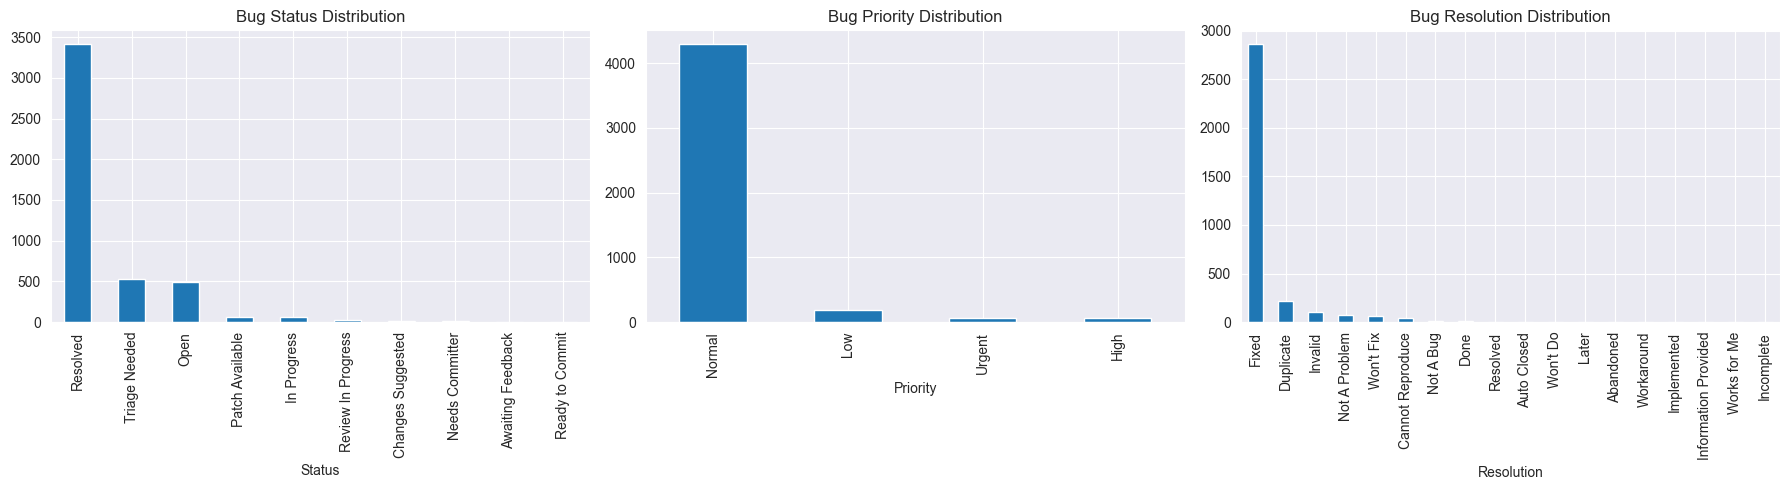

In [3]:
# Count plots for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bug Status Distribution
df['Status'].value_counts().plot(kind='bar', ax=axes[0], title='Bug Status Distribution')

# Bug Priority Distribution
df['Priority'].value_counts().plot(kind='bar', ax=axes[1], title='Bug Priority Distribution')

# Bug Resolution Distribution
df['Resolution'].value_counts().plot(kind='bar', ax=axes[2], title='Bug Resolution Distribution')

plt.tight_layout()
plt.show()


Temporal Analysis - Bug Reports Over Time

/var/folders/n0/718v1j4n1qd35rrf64zkh3k40000gn/T/ipykernel_39883/381426357.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created'] = pd.to_datetime(df['Created'], errors='coerce')
/var/folders/n0/718v1j4n1qd35rrf64zkh3k40000gn/T/ipykernel_39883/381426357.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Resolved'] = pd.to_datetime(df['Resolved'], errors='coerce')


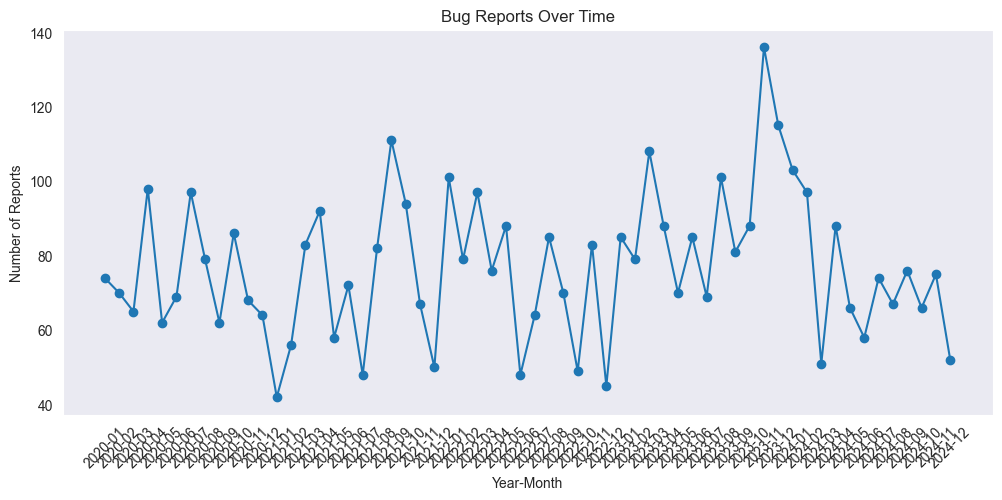

In [4]:
# Convert date columns
df['Created'] = pd.to_datetime(df['Created'], errors='coerce')
df['Resolved'] = pd.to_datetime(df['Resolved'], errors='coerce')

# Extract year-month
df['Created_YearMonth'] = df['Created'].dt.tz_localize(None).dt.to_period('M')
# df['Created_YearMonth'] = df['Created'].dt.to_period('M')

# Count bug reports per month
bug_report_trend = df['Created_YearMonth'].value_counts().sort_index()

# Plot bug report trends
plt.figure(figsize=(12, 5))
plt.plot(bug_report_trend.index.astype(str), bug_report_trend.values, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Bug Reports Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reports')
plt.grid()
plt.show()


Resolution Time Analysis

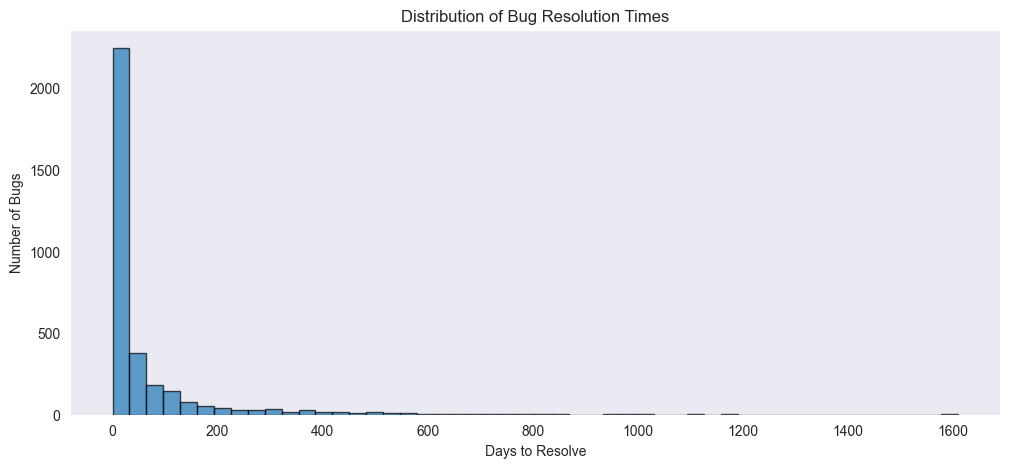

In [5]:
# Calculate resolution time
df['Resolution_Time'] = (df['Resolved'] - df['Created']).dt.days

# Plot distribution
plt.figure(figsize=(12, 5))
plt.hist(df['Resolution_Time'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Bug Resolution Times')
plt.xlabel('Days to Resolve')
plt.ylabel('Number of Bugs')
plt.grid()
plt.show()


Priority Vs Resolution

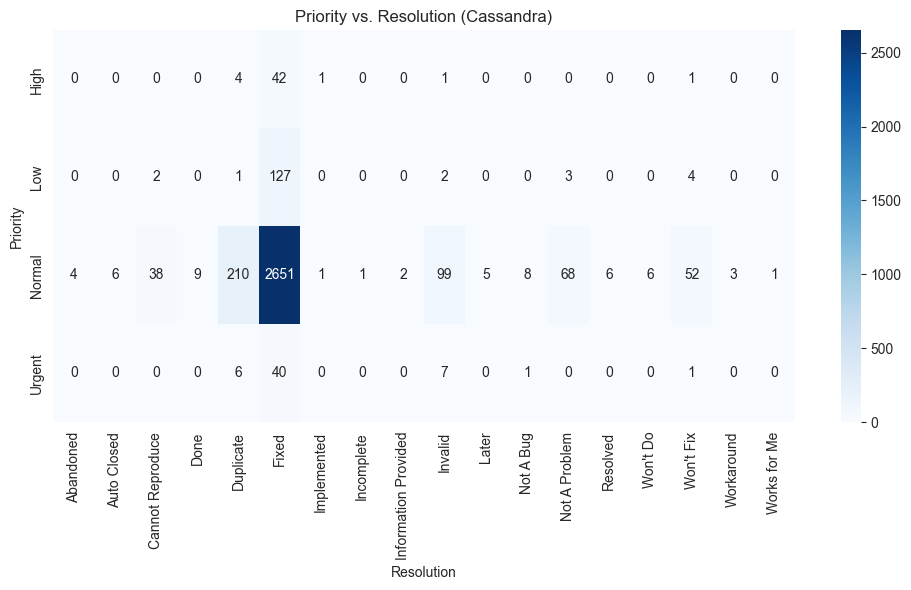

In [6]:

plt.figure(figsize=(10, 6))
priority_resolution = pd.crosstab(df["Priority"], df["Resolution"])
sns.heatmap(priority_resolution, annot=True, fmt="d", cmap="Blues")
plt.title("Priority vs. Resolution (Cassandra)")
plt.tight_layout()
plt.show()

Word Cloud for Bug Descriptions
python
Copy
Edit


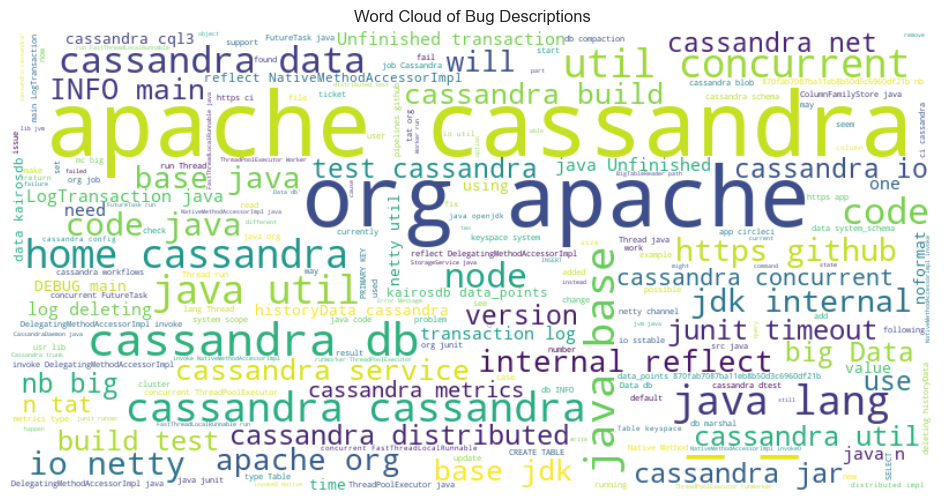

In [7]:
# Word Cloud for bug descriptions
text_data = ' '.join(str(desc) for desc in df['Description'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Bug Descriptions')
plt.show()
